In [1]:
## import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [2]:
data = pd.read_csv('Absenteeism_data.csv')

In [3]:
df= data.copy()

In [4]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [5]:
df.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [6]:
#the column 'ID' is in numerial which nominal data and harm the precision as well
#drop the Column
df.drop(['ID'],axis=1, inplace=True)

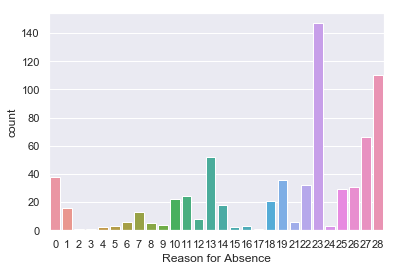

In [7]:
#see the distribution of "Reason for Absence"
sns.countplot(df['Reason for Absence'])

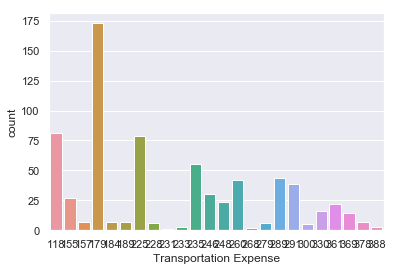

In [156]:
sns.countplot(df['Transportation Expense'])

In [8]:
#28 unique reasons for Absence which are represented with numerical ID
df['Reason for Absence'].nunique()

28

In [9]:
#resonsons for Absence is a categorical numerical data, where we have to convert into dummies for model
reason_col = pd.get_dummies(df['Reason for Absence'])

In [10]:
#convert into dummies
#to avoid multicollinearity, we are dropping the first column
reason_col = pd.get_dummies(df['Reason for Absence'], drop_first=True)
reason_col.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
#we are dropping the original column "Reason for Absence" before adding the new columns
df.drop(['Reason for Absence'],axis=1, inplace=True)

In [12]:
#As we see in created column "reasons_col" they are 27 columns which increased the dimenstionality of dataset
#if we observed the Reason for Absence data description, 
#we could see various reasons where we could group the related reasons into a single group 
# reasons 1 - 14 are all related to various dieseases, so we can group all these reasons into diesease class as class1
# 15-17 are all related to pregnency, grouped as class2
#18-22 are all about unidentified and poisoning related as class3
#22-28 are light problems or having consultations
#class1 = reason_col.loc[:, 1:14]
#class2 = reason_col.loc[:, 15:17]
#class3 = reason_col.loc[:, 18:22]
#class4 = reason_col.loc[:, 23:28]

In [13]:
#we have groped the reasons into four classes
#observed that reason for absence is any one of the reason for a person
#so we can convert the each calss into a single columns as below

class_1 = reason_col.loc[:, 1:14].max(axis=1)
class_2 = reason_col.loc[:, 15:17].max(axis=1)
class_3 = reason_col.loc[:, 18:22].max(axis=1)
class_4 = reason_col.loc[:, 23:28].max(axis=1)

In [14]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [15]:
df= pd.concat([class_1,class_2,class_3,class_4, df], axis=1)
df.head()

,0,1,2,3,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [16]:
df.columns.values

array([0, 1, 2, 3, 'Date', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours'], dtype=object)

In [17]:
columns_order = ['Class_1','Class_2','Class_3','Class_4', 'Date', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [18]:
df.columns = columns_order
df.head()

,Class_1,Class_2,Class_3,Class_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [19]:
#convert date type into timestamp 
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [20]:
months_values = []

In [21]:
for i in range(df.shape[0]):
   months_values.append(df['Date'][i].month)

In [22]:
df['Month values'] = months_values

In [23]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [24]:
day_values=[]
for i in range(df.shape[0]):
   day_values.append(df['Date'][i].weekday())

In [25]:
df['Day values'] = day_values
df.head()

,Class_1,Class_2,Class_3,Class_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month values,Day values
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [26]:
df.drop(['Date'], axis=1, inplace=True)


In [27]:
df.head()

,Class_1,Class_2,Class_3,Class_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month values,Day values
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2,7,3


In [28]:
df['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

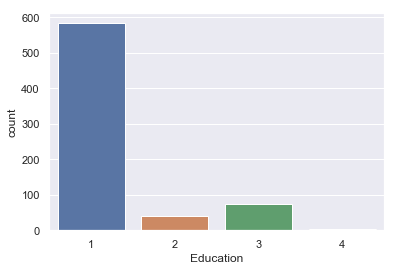

In [29]:
#distribution of Education column
#if we observe the description for education we can observe that most of them are high school level,
#so we can divede into two gropus basic education and higher education
sns.countplot(df['Education'])

In [30]:
#convert the values (2,3,4) as 1 and (1) as 0 by mapping
df['Education'] = df['Education'].map({1:0, 2:1, 3:1, 4:1})

In [45]:
df_new= df.copy()

In [46]:
#standardization is one of the most common preprocessing tools to aviod biased towards high values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
df_new.columns

Index(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours',
       'Month values', 'Day values'],
      dtype='object')

In [48]:
#this is simple and basic way of doing and 
#we should not transform all the date at time as other columns are having [0,1] (yes/no) columns information will affected.
transport_exp = df_new.iloc[:, 4:5]
distance = df_new.iloc[:,5:6]
age = df_new.iloc[:,6:7]
work_load = df_new.iloc[:,7:8]
body_mass = df_new.iloc[:,8:9]
childern = df_new.iloc[:,10:11]
pets = df_new.iloc[:,11:12]

In [49]:
df_new['transport_expenses'] = scaler.fit(transport_exp).transform(transport_exp)
df_new['Age_col'] = scaler.fit(age).transform(age)
df_new['Distane_col'] = scaler.fit(distance).transform(distance)
df_new['Work_load'] = scaler.fit(work_load).transform(work_load)
df_new['Body_Mass_Index'] = scaler.fit(body_mass).transform(body_mass)
df_new['Children_col'] = scaler.fit(childern).transform(childern)
df_new['Pets_col'] = scaler.fit(pets).transform(pets)

C:\Users\bluewelt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bluewelt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\bluewelt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bluewelt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\Users\bluewelt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

In [50]:
df_new.head()

,Class_1,Class_2,Class_3,Class_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,...,Absenteeism Time in Hours,Month values,Day values,transport_expenses,Age_col,Distane_col,Work_load,Body_Mass_Index,Children_col,Pets_col
0,0,0,0,1,289,36,33,239.554,30,0,...,4,7,1,1.005844,-0.536062,0.412816,-0.806331,0.767431,0.880469,0.268487
1,0,0,0,0,118,13,50,239.554,31,0,...,0,7,1,-1.574681,2.130803,-1.141882,-0.806331,1.002633,-0.019280,-0.589690
2,0,0,0,1,179,51,38,239.554,31,0,...,2,7,2,-0.654143,0.248310,1.426749,-0.806331,1.002633,-0.919030,-0.589690
3,1,0,0,0,279,5,39,239.554,24,0,...,4,7,3,0.854936,0.405184,-1.682647,-0.806331,-0.643782,0.880469,-0.589690
4,0,0,0,1,289,36,33,239.554,30,0,...,2,7,3,1.005844,-0.536062,0.412816,-0.806331,0.767431,0.880469,0.268487


In [51]:
df_new.drop(['Transportation Expense','Distance to Work','Age','Daily Work Load Average','Body Mass Index','Children','Pets'],axis=1, inplace=True)

In [63]:
df_new.head()

,Class_1,Class_2,Class_3,Class_4,Education,Absenteeism Time in Hours,Month values,Day values,transport_expenses,Age_col,Distane_col,Work_load,Body_Mass_Index,Children_col,Pets_col
0,0,0,0,1,0,4,7,1,1.005844,-0.536062,0.412816,-0.806331,0.767431,0.880469,0.268487
1,0,0,0,0,0,0,7,1,-1.574681,2.130803,-1.141882,-0.806331,1.002633,-0.019280,-0.589690
2,0,0,0,1,0,2,7,2,-0.654143,0.248310,1.426749,-0.806331,1.002633,-0.919030,-0.589690
3,1,0,0,0,0,4,7,3,0.854936,0.405184,-1.682647,-0.806331,-0.643782,0.880469,-0.589690
4,0,0,0,1,0,2,7,3,1.005844,-0.536062,0.412816,-0.806331,0.767431,0.880469,0.268487


In [64]:
df_new.columns.values

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Education',
       'Absenteeism Time in Hours', 'Month values', 'Day values',
       'transport_expenses', 'Age_col', 'Distane_col', 'Work_load',
       'Body_Mass_Index', 'Children_col', 'Pets_col'], dtype=object)

In [71]:
col_reorder = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Day values', 'Month values',
       'transport_expenses', 'Distane_col', 'Work_load', 'Age_col',
       'Body_Mass_Index', 'Education', 'Children_col', 'Pets_col',
       'Absenteeism Time in Hours']

In [72]:
df_new = df_new[col_reorder]

In [73]:
df_new.head()

,Class_1,Class_2,Class_3,Class_4,Day values,Month values,transport_expenses,Distane_col,Work_load,Age_col,Body_Mass_Index,Education,Children_col,Pets_col,Absenteeism Time in Hours
0,0,0,0,1,1,7,1.005844,0.412816,-0.806331,-0.536062,0.767431,0,0.880469,0.268487,4
1,0,0,0,0,1,7,-1.574681,-1.141882,-0.806331,2.130803,1.002633,0,-0.019280,-0.589690,0
2,0,0,0,1,2,7,-0.654143,1.426749,-0.806331,0.248310,1.002633,0,-0.919030,-0.589690,2
3,1,0,0,0,3,7,0.854936,-1.682647,-0.806331,0.405184,-0.643782,0,0.880469,-0.589690,4
4,0,0,0,1,3,7,1.005844,0.412816,-0.806331,-0.536062,0.767431,0,0.880469,0.268487,2


In [75]:
#targets for our logistic regression
#for classification the target variables should have categories 
#so we try to classify the Absenteesim into two classes'too much absent' or not by using median as cut-off value
#Below median value is "0" and above is "1", in this way we are almost balancing the data too
targets = np.where(df_new['Absenteeism Time in Hours'] > 
                   df_new['Absenteeism Time in Hours'].median(), 1, 0)

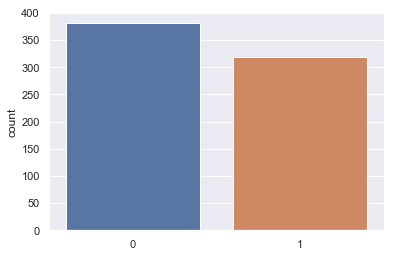

In [78]:
sns.countplot(targets)

In [79]:
df_new['High_Absenteeism'] = targets

In [80]:
#drop the "Absenteeism Time in Hours" column
df_new.drop(['Absenteeism Time in Hours'], axis=1, inplace=True)

In [82]:
df_new.head()

,Class_1,Class_2,Class_3,Class_4,Day values,Month values,transport_expenses,Distane_col,Work_load,Age_col,Body_Mass_Index,Education,Children_col,Pets_col,High_Absenteeism
0,0,0,0,1,1,7,1.005844,0.412816,-0.806331,-0.536062,0.767431,0,0.880469,0.268487,1
1,0,0,0,0,1,7,-1.574681,-1.141882,-0.806331,2.130803,1.002633,0,-0.019280,-0.589690,0
2,0,0,0,1,2,7,-0.654143,1.426749,-0.806331,0.248310,1.002633,0,-0.919030,-0.589690,0
3,1,0,0,0,3,7,0.854936,-1.682647,-0.806331,0.405184,-0.643782,0,0.880469,-0.589690,1
4,0,0,0,1,3,7,1.005844,0.412816,-0.806331,-0.536062,0.767431,0,0.880469,0.268487,0


In [88]:
#The data is ready for model
#now select the independent variables and dependent variabl
y = df_new.iloc[:,-1:]
x = df_new.drop(['High_Absenteeism'], axis=1)
x.head()

,Class_1,Class_2,Class_3,Class_4,Day values,Month values,transport_expenses,Distane_col,Work_load,Age_col,Body_Mass_Index,Education,Children_col,Pets_col
0,0,0,0,1,1,7,1.005844,0.412816,-0.806331,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,1,7,-1.574681,-1.141882,-0.806331,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,2,7,-0.654143,1.426749,-0.806331,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,3,7,0.854936,-1.682647,-0.806331,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,3,7,1.005844,0.412816,-0.806331,-0.536062,0.767431,0,0.880469,0.268487


In [92]:
# import the logistic model from sklearn
# import train_test_split so we can split our data into train and test
# import the 'metrics' module, 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [93]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2, random_state = 20)

In [95]:
# create a logistic regression object
reg = LogisticRegression()
#fit the training inputs
reg.fit(X_train, Y_train)


C:\Users\bluewelt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bluewelt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
reg.score(X_train,Y_train)

0.7964285714285714

In [101]:
predict = reg.predict(X_test)

In [104]:
cnf_matrix = metrics.confusion_matrix(Y_test, predict)
cnf_matrix

array([[59, 15],
       [17, 49]], dtype=int64)

In [107]:
print("Accuracy:",metrics.accuracy_score(Y_test, predict)*100)
print("Precision:",metrics.precision_score(Y_test, predict)*100)
print("Recall:",metrics.recall_score(Y_test, predict)*100)

Accuracy: 77.14285714285715
Precision: 76.5625
Recall: 74.24242424242425


In [108]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [131]:
clf=RandomForestClassifier(n_estimators=100)


In [132]:
clf.fit(X_train,Y_train)


C:\Users\bluewelt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
y_pred=clf.predict(X_test)


In [134]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.75


In [193]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_sample_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf': min_sample_leaf,
               'bootstrap' : bootstrap
              }

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv=5, error_score= np.nan, 
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.5min finished
C:\Users\bluewelt\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=

In [194]:
rf_random.best_params_

{'n_estimators': 1700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [198]:
from sklearn.ensemble import RandomForestClassifier
model_random = rf_random.best_estimator_
model_random.fit(X_train, Y_train)
predictions_random = model_random.predict(X_test)

C:\Users\bluewelt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [199]:
print("Accuracy:",metrics.accuracy_score(Y_test, predictions_random))

Accuracy: 0.7714285714285715


In [167]:
# get the intercept (bias) of our model
reg.intercept_

array([-1.58504323])

In [174]:
# get the coefficients (weights) of our model
reg.coef_

array([[ 2.54321167,  0.82324065,  3.20681665,  0.39532461, -0.0623652 ,
         0.05203504,  0.55329028, -0.00790913, -0.02422302, -0.15812633,
         0.23865525, -0.40538586,  0.31744259, -0.43102221]])

In [183]:
#Creating summary table
feature_name = x.columns.values
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)
summary_table

,Feature name
0,Class_1
1,Class_2
2,Class_3
3,Class_4
4,Day values
5,Month values
6,transport_expenses
7,Distane_col
8,Work_load
9,Age_col


In [184]:
summary_table['Coefficient'] = np.transpose(reg.coef_)

In [185]:
summary_table

,Feature name,Coefficient
0,Class_1,2.543212
1,Class_2,0.823241
2,Class_3,3.206817
3,Class_4,0.395325
4,Day values,-0.062365
5,Month values,0.052035
6,transport_expenses,0.553290
7,Distane_col,-0.007909
8,Work_load,-0.024223
9,Age_col,-0.158126


In [186]:
# move all indices by 1
summary_table.index = summary_table.index + 1

# add the intercept at index 0
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

# sort the df by index
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-1.585043
1,Class_1,2.543212
2,Class_2,0.823241
3,Class_3,3.206817
4,Class_4,0.395325
5,Day values,-0.062365
6,Month values,0.052035
7,transport_expenses,0.553290
8,Distane_col,-0.007909
9,Work_load,-0.024223


In [191]:
# create a new Series called: 'Odds ratio' which will show the.. odds ratio of each feature
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)


In [192]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
3,Class_3,3.206817,24.700331
1,Class_1,2.543212,12.720459
2,Class_2,0.823241,2.277870
7,transport_expenses,0.553290,1.738965
4,Class_4,0.395325,1.484866
13,Children_col,0.317443,1.373610
11,Body_Mass_Index,0.238655,1.269541
6,Month values,0.052035,1.053413
8,Distane_col,-0.007909,0.992122
9,Work_load,-0.024223,0.976068
